## Estatistica Descritiva 

Em sua essência, a estatística é a ciência que apresenta processos próprios para coletar, apresentar e interpretar adequadamente conjuntos de dados, sejam eles numéricos ou não.Pode-se dizer que seu objetivo é o de apresentar informações sobre dados em análise que se tenha maior compreensão dos fatos que os mesmos representam.

A <strong>Estatístic Descritiva</strong>, como o próprio nome ja diz, se preocupa em  descrever os dados.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
Base_Dados = sns.load_dataset('iris')

Base_Dados.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
Base_Dados.shape

(150, 5)

## Módulo 1 - Medidas de Tendência Central

As medidas de tendência central são assim denominadas por indicarem um ponto em torno do qual se concentram os dados.

### Média Aritimética

A Média Aritimética (X) é a soma de todos os valores observados da variável dividida pelo número total de observações

In [7]:
Base_Dados['petal_length'].mean()

3.7580000000000005

### Moda

A moda (Mo) é o valor que apresenta maior frequencia da variável entre os valores observados.

In [8]:
Base_Dados['petal_length'].mode()

0    1.4
1    1.5
Name: petal_length, dtype: float64

### Mediana 

A mediana (Md) é o valor que ocupa a posição central da série de observações de uma variável, em rol, dividindo o conjunto em duas partes iguais, ou seja, a quantidade de valores inferiores á mediana é igual a quantidade de valores superiores á mediana.

In [9]:
Base_Dados['petal_length'].median()

4.35

## Módulo 2 - Medidas Separatizes

Estas medidas são valores que ocupam posições no conjunto, em rol, dividindo-o em partes iguais.

1. Quartil: Os quartis dividem o conjunto de dados em quatro partes iguais.

<img src="475-Quartil-e-Percentil.webp" width=600></img>

In [12]:
Base_Dados['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

<Axes: ylabel='sepal_length'>

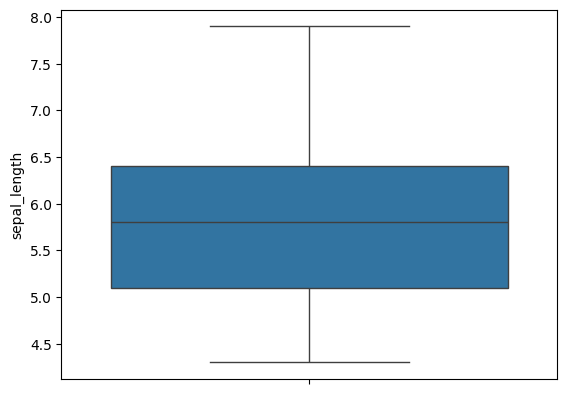

In [15]:
sns.boxplot(Base_Dados['sepal_length'])

## Módulo 3 - Medidas de Dispersão

As medias de dispersão auxiliam as medias de tendência central a descrever o conjunto de dados de dados adequadamente. Indicam se os dados estão, ou não, próximos uns dos outros.

### Amplitude Total

A amplitude total de um conjunto de dados é a diferença entre o maior e o menor valor observado.

In [16]:
Base_Dados['sepal_length'].max() - Base_Dados['sepal_length'].min()

3.6000000000000005

### Amplitude Interquartílica

A amplitude interqualificada é a diferença entre o terceiro e o primeiro quartil. Esta medida é a mais estável que a amplitude total por não considerar os valores mais externos.

In [21]:
Base_Dados['sepal_length'].describe()[6:7].values - Base_Dados['sepal_length'].describe()[4:5].values 

array([1.3])

### Amplitude semi-interquartílica

A amplitude semi-interquartílica é definida como a média aritimética da diferença entre a mediana e os quartis.




In [22]:
(Base_Dados['sepal_length'].describe()[6:7].values - Base_Dados['sepal_length'].describe()[4:5].values ) / 2

array([0.65])

### Variância

Uma medida de dispersão que mostra quão distante os valores estão da média

In [23]:
Base_Dados['sepal_length'].var()

0.6856935123042507

### Desvio Padrão

É o resultado positivo da raiz quadrada da variância

In [27]:
print(Base_Dados['sepal_length'].std())

print(Base_Dados['sepal_length'].var()**(1/2))

0.828066127977863
0.828066127977863


### Medidas de Assimetria 

A medida de assimetria é um indicador de forma de distribuição dos dados. Ao construir uma distribuição de frequência e/ou um histograma, está-se buscando, também, identificar visualmente, a forma da distribuição dos dados.

<img src="assimetriacurtose-1024x576.jpg.webp" width=600></img>

<strong>Simétrica</strong> se média = mediana = moda ou As = 0

<strong>Assimétrica</strong> negativa se média <= mediana <= moda ou As < 0

<strong>Assimétrica</strong> positiva se média >= mediana >= moda ou As > 0


In [28]:
Base_Dados['sepal_length'].skew()

0.3149109566369728

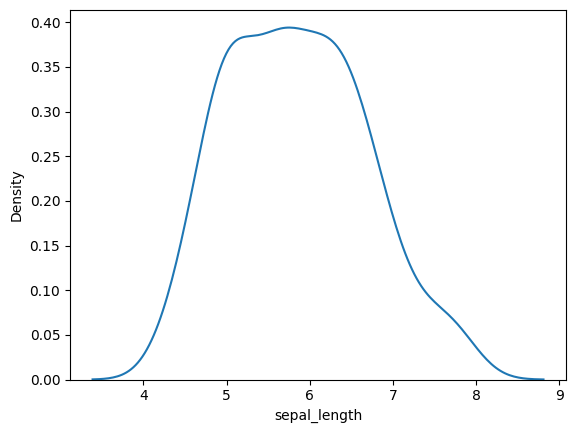

In [29]:
sns.kdeplot(Base_Dados['sepal_length']);

### Medidas de Curtose 

A medida de curtose é o grau de achatamento de distribuição, é um indicador da forma desta distribuição.

<img src="unnamed-7-768x475.png" width=500></img>

<strong>Leptocúrtica:</strong> Quando a distribuição apresenta uma curva de frequencia bastante fechada com os dados fortemente concentrados em torno do seu centro, K < 0,263

<strong>Mesocúrtica:</strong>Quando os dados são razoavelmente concentrados em torno de seu centro, K = 0,263

<strong>Platicúrtica:</strong> Quando a distribuição apresenta ua curva mais aberta, com os dados fracamente concentrados em torno de seu centro, K > 0,263

In [30]:
Base_Dados['sepal_length'].kurtosis()

-0.5520640413156395

## Módulo 4 - Correlação

### Quando fazer uma correlação?

quando você tem uma hipótese de que o aumento ou queda em uma variável estão associados á evolução de outra variável, por exemplo, se aumentar o desconto, as vendas também aumentam.

### Correlação de Pearson

O coeficiente de correlação de Pearson pode ter um intervalo de +1 e -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, á medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável. Um valor menor que 0 indica uma associação negativa. Isto é, á medida que o valor de uma variável aumenta, o valor da outra variável diminui.

In [33]:
# Selecionar apenas colunas numéricas
corr_matrix = Base_Dados.select_dtypes(include=[float, int]).corr()
display(corr_matrix)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

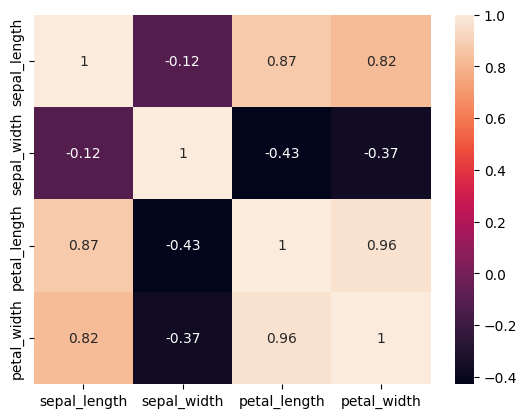

In [35]:
sns.heatmap( Base_Dados.select_dtypes(include=[float, int]).corr(), annot=True)

<Axes: xlabel='petal_length', ylabel='petal_width'>

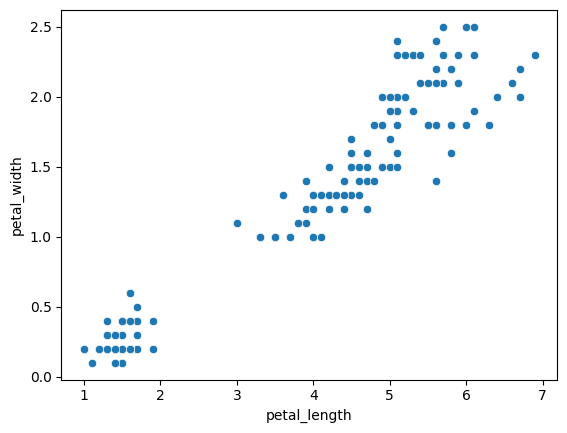

In [36]:
sns.scatterplot( data=Base_Dados, x = 'petal_length', y = 'petal_width')

### Correlação de Spearman

uma vez que acorrelaçao de Spearman segue uma lógica monotética, e não tem pressupostos lineares como na correlação de Pearson, é possível utilizar o rs para relações não Lineares.

<img src="8.png" wifth=600></img>

In [39]:
Base_Dados.select_dtypes(include=[float, int]).corr('spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


<Axes: >

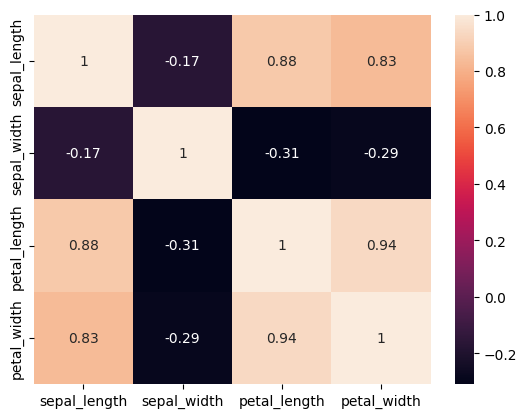

In [42]:
sns.heatmap(data=Base_Dados.select_dtypes(include=[float, int]).corr('spearman'), annot=True)